# Feature Selection

In this notebook we will be exploring which all features to select for our Predictive model, Also we will be looking into some of the following tools

## Importing Libraries

In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

## Loading Data

In [2]:
data= pd.read_csv("./Dataset/new_data_feature.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv1,rv2,date_time,dayoftheweek,WeekDayType,timeofDay,activeStatus,NSM,weekOfTheYear,season
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,2016-01-11 17:00:00,Monday,Weekday,Day,awake,61200,2,winter
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,2016-01-11 17:10:00,Monday,Weekday,Day,awake,61800,2,winter
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,2016-01-11 17:20:00,Monday,Weekday,Day,awake,62400,2,winter
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,2016-01-11 17:30:00,Monday,Weekday,Day,awake,63000,2,winter
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,2016-01-11 17:40:00,Monday,Weekday,Day,awake,63600,2,winter


In [3]:
data.shape

(19735, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 37 columns):
date             19735 non-null object
Appliances       19735 non-null int64
lights           19735 non-null int64
T1               19735 non-null float64
RH_1             19735 non-null float64
T2               19735 non-null float64
RH_2             19735 non-null float64
T3               19735 non-null float64
RH_3             19735 non-null float64
T4               19735 non-null float64
RH_4             19735 non-null float64
T5               19735 non-null float64
RH_5             19735 non-null float64
T6               19735 non-null float64
RH_6             19735 non-null float64
T7               19735 non-null float64
RH_7             19735 non-null float64
T8               19735 non-null float64
RH_8             19735 non-null float64
T9               19735 non-null float64
RH_9             19735 non-null float64
T_out            19735 non-null float64
Press_mm_hg     

In [5]:
data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d %H:%M:%S")
data = data.drop(columns=['date_time','rv1','rv2'])

## Adding Dummies to Categorical Data

In [6]:
data = pd.get_dummies(data, columns=["timeofDay","activeStatus",'dayoftheweek','WeekDayType','season'])

In [7]:
data['NSM'].head()

0    61200
1    61800
2    62400
3    63000
4    63600
Name: NSM, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 44 columns):
date                      19735 non-null datetime64[ns]
Appliances                19735 non-null int64
lights                    19735 non-null int64
T1                        19735 non-null float64
RH_1                      19735 non-null float64
T2                        19735 non-null float64
RH_2                      19735 non-null float64
T3                        19735 non-null float64
RH_3                      19735 non-null float64
T4                        19735 non-null float64
RH_4                      19735 non-null float64
T5                        19735 non-null float64
RH_5                      19735 non-null float64
T6                        19735 non-null float64
RH_6                      19735 non-null float64
T7                        19735 non-null float64
RH_7                      19735 non-null float64
T8                        19735 non-null float64
RH_8  

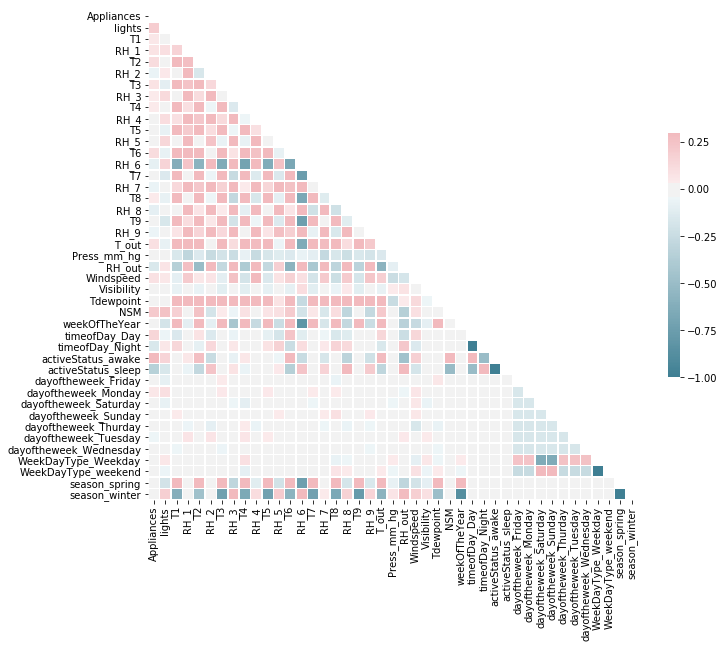

In [9]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

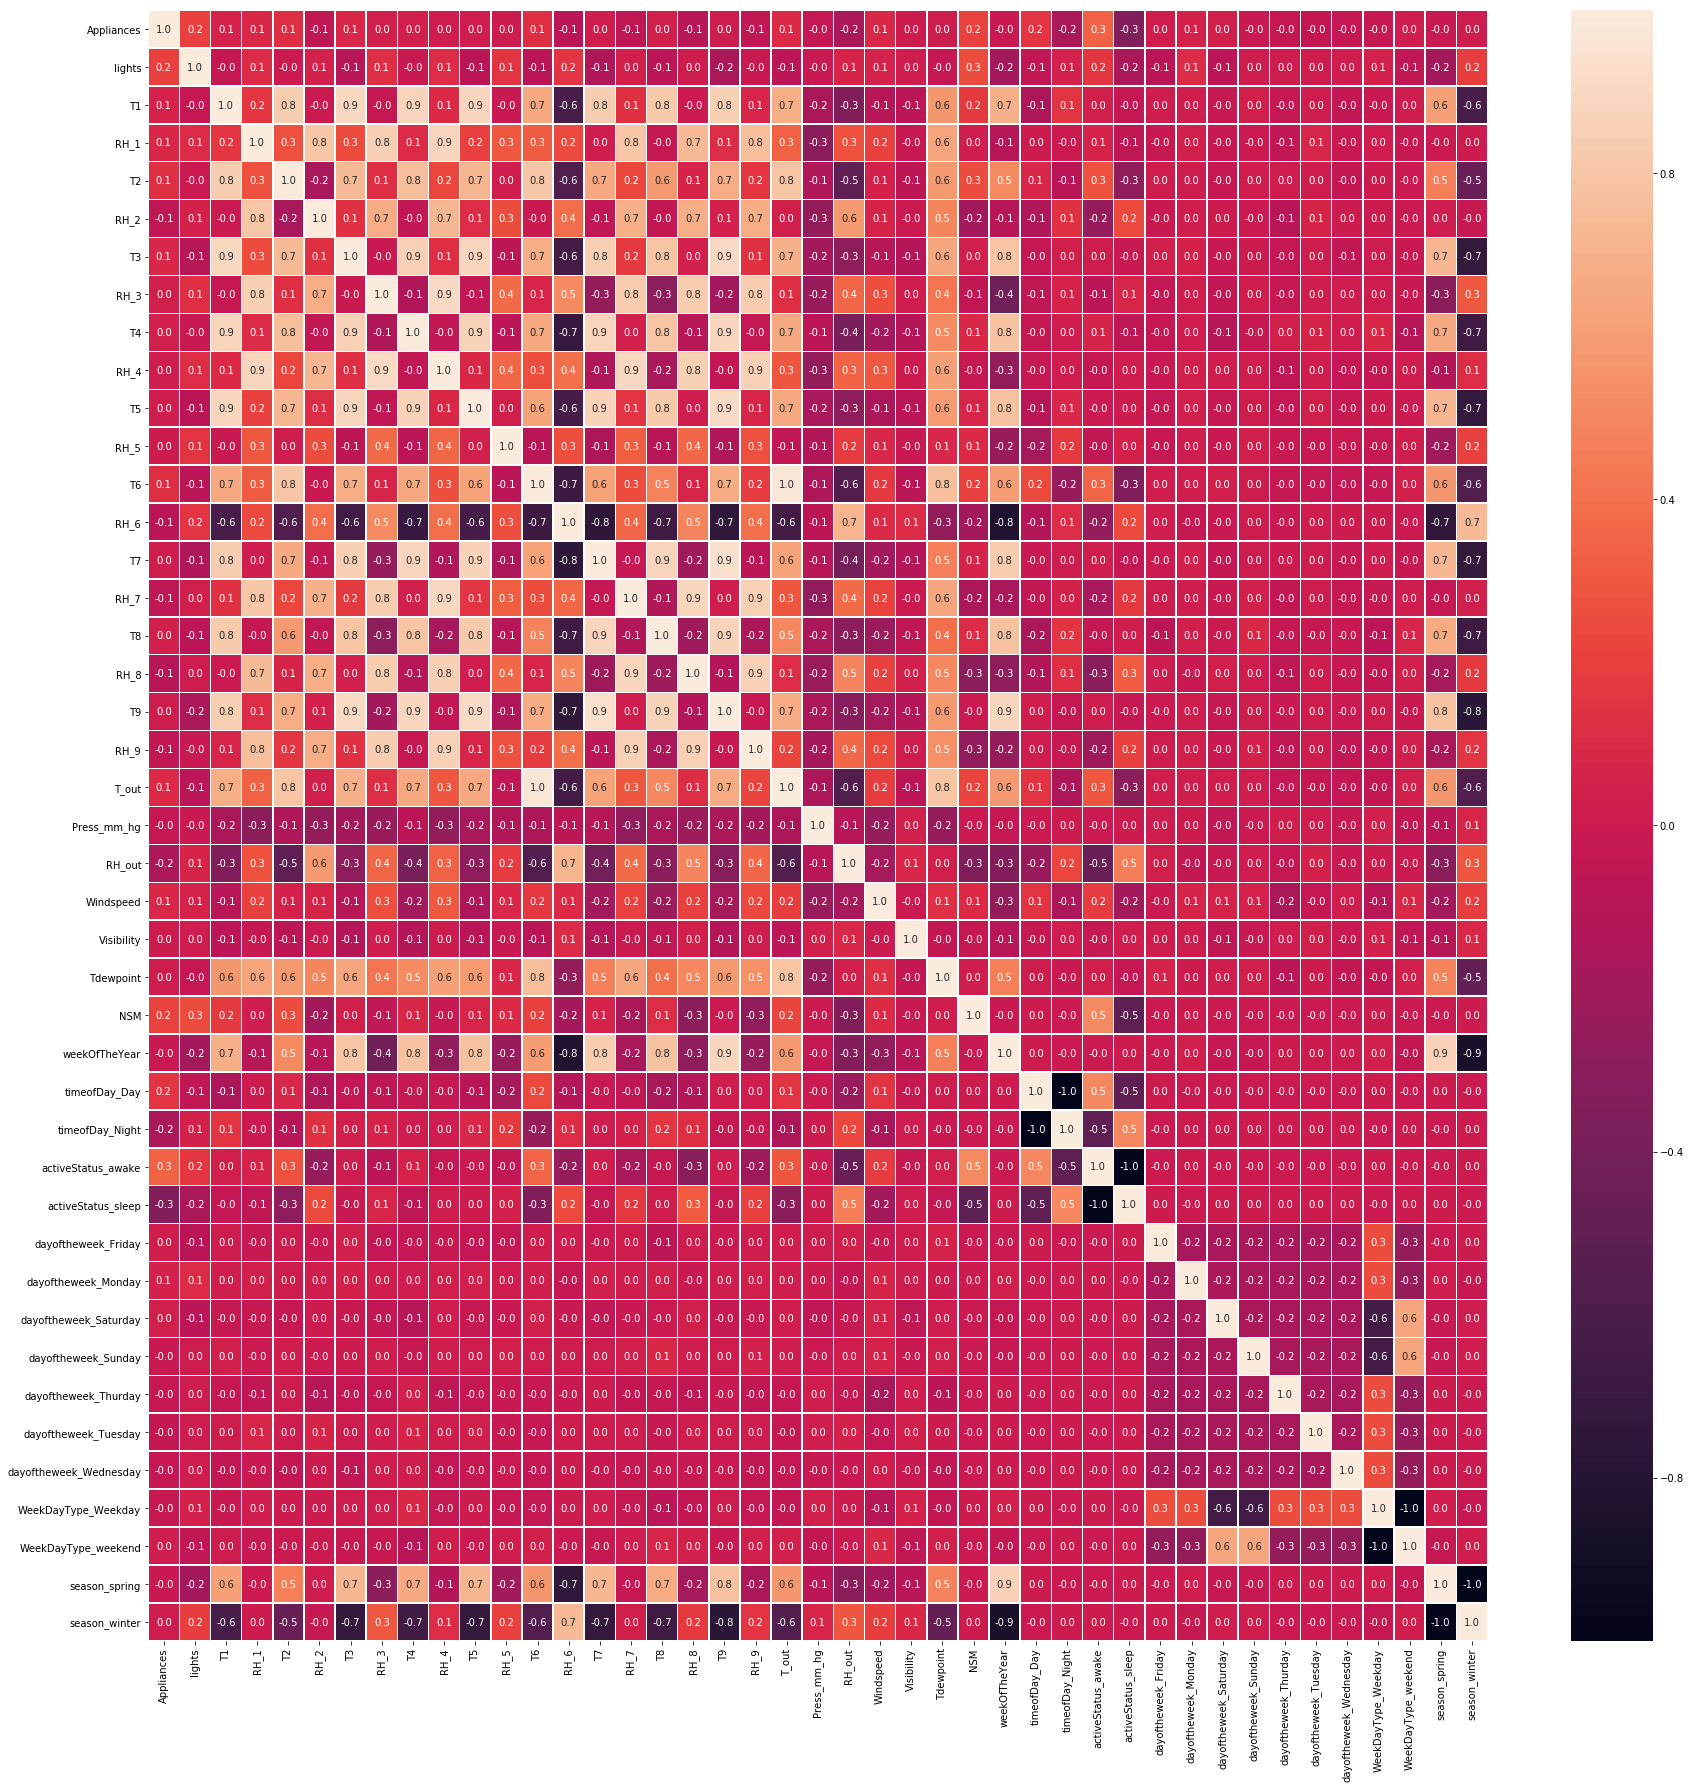

In [55]:
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [11]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
k = get_top_abs_correlations(data.drop(columns=['date']), 43)
print(k)

Top Absolute Correlations
season_spring        season_winter          1.000000
activeStatus_awake   activeStatus_sleep     1.000000
WeekDayType_Weekday  WeekDayType_weekend    1.000000
timeofDay_Day        timeofDay_Night        1.000000
T6                   T_out                  0.974787
T7                   T9                     0.944776
T5                   T9                     0.911055
T3                   T9                     0.901324
RH_3                 RH_4                   0.898978
RH_4                 RH_7                   0.894301
T1                   T3                     0.892402
T4                   T9                     0.889439
T9                   weekOfTheYear          0.888777
T3                   T5                     0.888169
T1                   T5                     0.885247
RH_7                 RH_8                   0.883984
T7                   T8                     0.882123
RH_1                 RH_4                   0.880359
T4                  

## Tree-based feature selection

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = data.drop(columns=['date','Appliances'])
y = data['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

In [13]:
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)
clf.feature_importances_

array([ 0.01797956,  0.03230597,  0.03704416,  0.03637699,  0.03891655,
        0.03219674,  0.03628449,  0.03202299,  0.03595797,  0.02971513,
        0.03792725,  0.03878429,  0.0389791 ,  0.02920544,  0.03741345,
        0.03711817,  0.04153359,  0.02444929,  0.03817287,  0.04075523,
        0.03602517,  0.03914738,  0.03065093,  0.02862045,  0.03884515,
        0.05087173,  0.00892169,  0.00530939,  0.00324063,  0.00979389,
        0.01706268,  0.00461761,  0.00366202,  0.0031007 ,  0.00284067,
        0.00387004,  0.00431743,  0.00468568,  0.00291985,  0.00294152,
        0.00226851,  0.00314763])

In [14]:

def rankPrintImportance(importance,df):
    rank = sorted(zip(map(lambda x: x, importance), list(df)), 
                 reverse=True)
    for ran in rank:
        print(ran)

In [17]:
rankPrintImportance(clf.feature_importances_,X)

(0.050871727795728947, 'NSM')
(0.04153358531548125, 'RH_8')
(0.040755229515751085, 'T_out')
(0.039147377388353582, 'RH_out')
(0.038979099485714166, 'RH_6')
(0.038916551969747477, 'RH_2')
(0.038845149949166505, 'Tdewpoint')
(0.038784292178896861, 'T6')
(0.038172867719584974, 'RH_9')
(0.03792724590891456, 'RH_5')
(0.037413454198729074, 'RH_7')
(0.03711816686153966, 'T8')
(0.037044158836466681, 'RH_1')
(0.03637699146270993, 'T2')
(0.036284493228667371, 'RH_3')
(0.036025173128112764, 'Press_mm_hg')
(0.035957974906905311, 'RH_4')
(0.032305972970807478, 'T1')
(0.032196739975102771, 'T3')
(0.032022990651246787, 'T4')
(0.030650932899262805, 'Windspeed')
(0.029715130214769229, 'T5')
(0.029205435580773726, 'T7')
(0.028620453884385572, 'Visibility')
(0.024449290589201245, 'T9')
(0.017979555379983123, 'lights')
(0.017062683656662091, 'activeStatus_sleep')
(0.009793889569340011, 'activeStatus_awake')
(0.0089216939184275958, 'weekOfTheYear')
(0.0053093943200205503, 'timeofDay_Day')
(0.00468568124962

## Feature ranking with recursive feature elimination

In [15]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
X = data.drop(columns=['date','Appliances'])
y = data['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X_train, y_train)
selector.ranking_

### from xgboost import XGBClassifier

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler

(0.094970226, 'NSM')
(0.054554667, 'Press_mm_hg')
(0.050475106, 'RH_3')
(0.049461547, 'RH_5')
(0.049334854, 'T3')
(0.04358292, 'RH_1')
(0.042138603, 'RH_2')
(0.039782085, 'T8')
(0.036361333, 'T6')
(0.035727859, 'RH_8')
(0.034232866, 'RH_out')
(0.034030154, 'Windspeed')
(0.032332446, 'Visibility')
(0.032104395, 'RH_7')
(0.030432029, 'RH_6')
(0.029747877, 'RH_9')
(0.028100848, 'T2')
(0.027898138, 'RH_4')
(0.027340682, 'T4')
(0.025997719, 'Tdewpoint')
(0.025718991, 'activeStatus_awake')
(0.024553401, 'T1')
(0.02412264, 'T7')
(0.023109084, 'T5')
(0.023083745, 'T_out')
(0.020144431, 'lights')
(0.015152667, 'T9')
(0.012340048, 'weekOfTheYear')
(0.0063854046, 'dayoftheweek_Friday')
(0.0058786268, 'dayoftheweek_Monday')
(0.0046370202, 'dayoftheweek_Tuesday')
(0.0041809198, 'timeofDay_Day')
(0.0037248195, 'dayoftheweek_Wednesday')
(0.0030660077, 'dayoftheweek_Saturday')
(0.0019004181, 'dayoftheweek_Sunday')
(0.0018244013, 'dayoftheweek_Thurday')
(0.0015710123, 'WeekDayType_Weekday')
(0.0, 'time

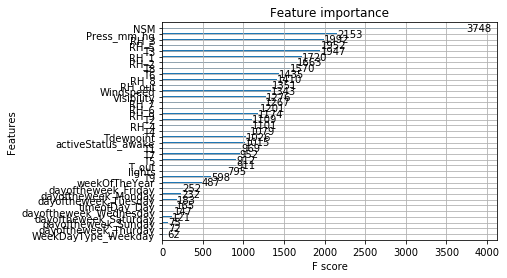

In [46]:
X = data.drop(columns=['date','Appliances'])
y = data['Appliances']

# min_max_scaler = MinMaxScaler()
# X = min_max_scaler.fit_transform(X)
# y = min_max_scaler.fit_transform(y.reshape(1, -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rankPrintImportance(model.feature_importances_,X)
plot_importance(model)

In [40]:
print(r2_score(y_test, y_pred))

0.0425924319289


In [56]:
from sklearn.feature_selection import SelectKBest

In [64]:
selector = SelectKBest( k='all').fit(X_train,y_train)
scores = selector.scores_

In [67]:
rankPrintImportance(scores,X_train)

(78.579988972313828, 'activeStatus_awake')
(78.579988972313643, 'activeStatus_sleep')
(46.178128201763471, 'NSM')
(25.535009922015202, 'T8')
(21.362245361303209, 'T1')
(19.767072606075324, 'lights')
(18.937533820541059, 'T2')
(18.648902240516058, 'T4')
(17.99576911923559, 'T3')
(17.453373792579512, 'T5')
(16.966266235332427, 'T9')
(16.670528374453919, 'T7')
(16.569534028490967, 'RH_6')
(15.865625255097006, 'RH_out')
(14.919151511609662, 'weekOfTheYear')
(14.826475997806703, 'T6')
(13.031964300949062, 'T_out')
(12.752008592896255, 'season_winter')
(12.752008592896255, 'season_spring')
(10.405810300994457, 'RH_8')
(10.136276558234192, 'timeofDay_Night')
(10.136276558234192, 'timeofDay_Day')
(8.6720040590678664, 'RH_9')
(5.5074134642141308, 'RH_3')
(4.9590110747418423, 'Tdewpoint')
(4.6155602951095567, 'RH_2')
(4.2147695354256083, 'RH_7')
(3.9917866228248098, 'Windspeed')
(3.9466503563622712, 'RH_1')
(3.3318509963658931, 'Press_mm_hg')
(2.6144340191358775, 'dayoftheweek_Tuesday')
(2.48865

## Boruta

In [75]:
!pip3 install boruta

  Cache entry deserialization failed, entry ignored


In [89]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [93]:

 
# load X and y
X = data.drop(columns=['date','Appliances']).values
y = data['Appliances'].values
print(X,y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
forest = RandomForestClassifier(n_jobs=-1)
 
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)
 
# check selected features
feat_selector.support_
 
# check ranking of features
feat_selector.ranking_

[[ 30.          19.89        47.59666667 ...,   0.           0.           1.        ]
 [ 30.          19.89        46.69333333 ...,   0.           0.           1.        ]
 [ 30.          19.89        46.3        ...,   0.           0.           1.        ]
 ..., 
 [ 10.          25.5         46.59666667 ...,   0.           1.           0.        ]
 [ 10.          25.5         46.99       ...,   0.           1.           0.        ]
 [ 10.          25.5         46.6        ...,   0.           1.           0.        ]] [ 60  60  50 ..., 270 420 430]
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	31


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	31


BorutaPy finished running.

Iteration: 	33 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	31


array([18, 10,  6,  1,  2, 10,  3,  8,  7, 10,  1,  1,  5, 12,  3,  1,  1,
       14,  1,  1,  1,  1, 13, 15,  1,  1, 19, 20, 20, 16, 16, 26, 29, 28,
       30, 27, 25, 22, 23, 23, 31, 32])

In [103]:
feat_selector.ranking_

array([18, 10,  6,  1,  2, 10,  3,  8,  7, 10,  1,  1,  5, 12,  3,  1,  1,
       14,  1,  1,  1,  1, 13, 15,  1,  1, 19, 20, 20, 16, 16, 26, 29, 28,
       30, 27, 25, 22, 23, 23, 31, 32])

In [108]:
X_filtered = feat_selector.transform(X)
X_filtered.shape

(19735, 11)

In [71]:
from tsfresh import extract_features
timeseries, y = X_train
extracted_features = extract_features(timeseries, column_id="T1", column_sort="date")

ValueError: too many values to unpack (expected 2)

### Featuretools

In [111]:
import featuretools as ft

In [115]:
 entities = {
    "data" : (data, "date", "Appliances"),
}

In [116]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities)

KeyError: 'Entity None does not exist in dfs'